In this notebook, we clusterize our 200k entries so that each future customer could compare with persons owning his group.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_train_scaled.csv', index_col = 0)

In [3]:
X.shape

(181547, 15)

In [4]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
102348,0.000000,0.001312,0.080920,0.124976,0.075196,0.035898,0.020717,0.311380,0.655002,0.093999,1,0.061379,0.129915,0.675338,0.158837
239055,0.000000,0.000350,0.084027,0.065238,0.068462,0.010942,0.080818,0.317216,0.272637,0.195010,1,0.169448,0.190565,0.243073,0.181402
218192,0.000000,0.000350,0.067416,0.055959,0.068462,0.427311,0.206952,0.674587,0.687844,0.564228,4,0.139876,0.166312,0.271159,0.145299
268303,0.105263,0.000235,0.060892,0.045361,0.049383,0.010775,0.163076,0.583854,0.224006,0.442149,4,0.160364,0.173305,0.223903,0.181403
36991,0.052632,0.002081,0.211254,0.130793,0.169473,0.507258,0.349616,0.004029,0.114984,0.818570,5,0.098878,0.090359,0.151121,0.185915


Text(0, 0.5, 'Inertia')

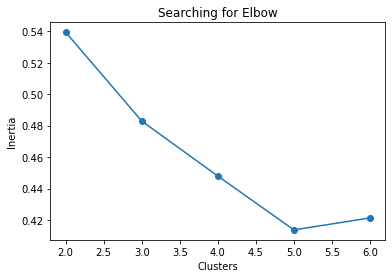

In [5]:
from sklearn import cluster, metrics

# Initialization, empty list
silhouettes = []

for num_clusters in range(2, 7):
    
    # Creating KMEANS for each number of clusters
    cls = cluster.KMeans(n_clusters=num_clusters)
    
    # Fitting model
    cls.fit(X)
    
    # Silhouette_score for each model
    silh = metrics.silhouette_score(X,cls.labels_)
    
    # Adding score in empty list for each model
    silhouettes.append(silh)
    
    

plt.plot(range(2, 7), silhouettes, marker = 'o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [6]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

cls = cluster.KMeans(n_clusters = 5)

# Creating PCA
pca = PCA(n_components = 2)

# Fit
pca.fit(X)

# We want to see the explained variance of our 2 features
print (pca.explained_variance_ratio_.cumsum())

# Transforming our X in 2 dimensions
X_trans_2= pca.transform(X)

[0.94008511 0.95424986]


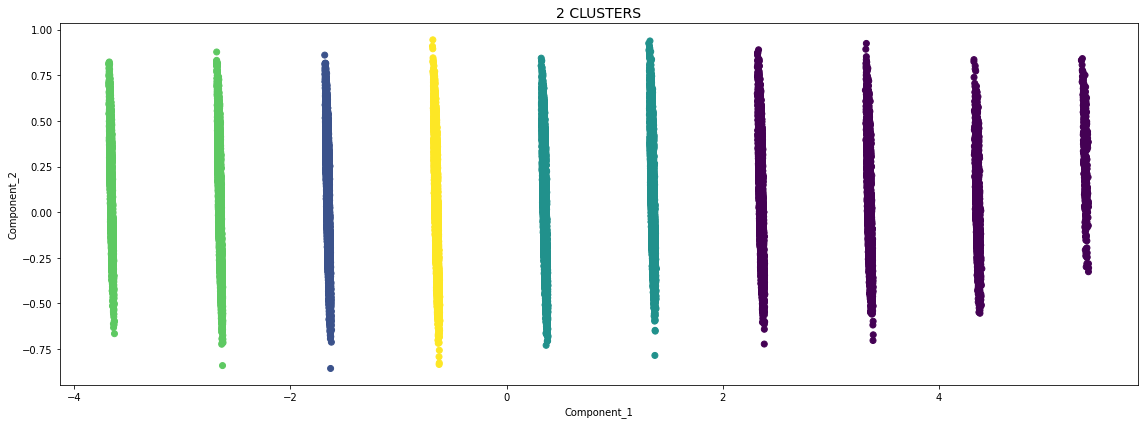

In [7]:
fig = plt.figure(figsize = [16,6])

# 3 clusters
cls = cluster.KMeans(n_clusters = 5)
cls.fit(X_trans_2)

# 
ax = fig.gca()  

# Spatial coordinates of each point in function of our 3 components
x = X_trans_2[:,0]
y = X_trans_2[:,1]


# Plotting scatters distinguishing our 2 clusters
ax.scatter(x, y, label='', marker = 'o',c = cls.labels_)

# Naming axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')


# Title
plt.title("2 CLUSTERS", fontsize = 14)

plt.tight_layout()
plt.show()


In [8]:
# fitting with our data
km = cls.fit(X)

In [9]:
km

KMeans(n_clusters=5)

In [10]:
import pickle

In [11]:
pickle.dump (km, open ('clustering', 'wb'))

In [15]:
# Labels
km.labels_

array([0, 0, 1, ..., 0, 0, 1])

In [16]:
#check
km.labels_.shape

(181547,)

In [17]:
# Adding membership group on your DataFrame

MEMBERSHIP = model.labels_
X['MEMBERSHIP'] = MEMBERSHIP
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
102348,0.000000,0.001312,0.080920,0.124976,0.075196,0.035898,0.020717,0.311380,0.655002,0.093999,1,0.061379,0.129915,0.675338,0.158837,0
239055,0.000000,0.000350,0.084027,0.065238,0.068462,0.010942,0.080818,0.317216,0.272637,0.195010,1,0.169448,0.190565,0.243073,0.181402,0
218192,0.000000,0.000350,0.067416,0.055959,0.068462,0.427311,0.206952,0.674587,0.687844,0.564228,4,0.139876,0.166312,0.271159,0.145299,1
268303,0.105263,0.000235,0.060892,0.045361,0.049383,0.010775,0.163076,0.583854,0.224006,0.442149,4,0.160364,0.173305,0.223903,0.181403,1
36991,0.052632,0.002081,0.211254,0.130793,0.169473,0.507258,0.349616,0.004029,0.114984,0.818570,5,0.098878,0.090359,0.151121,0.185915,2


In [18]:
X0 = X[X['MEMBERSHIP']== 0]

In [19]:
X0.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
102348,0.000000,0.001312,0.080920,0.124976,0.075196,0.035898,0.020717,0.311380,0.655002,0.093999,1,0.061379,0.129915,0.675338,0.158837,0
239055,0.000000,0.000350,0.084027,0.065238,0.068462,0.010942,0.080818,0.317216,0.272637,0.195010,1,0.169448,0.190565,0.243073,0.181402,0
48142,0.000000,0.000927,0.101124,0.124185,0.102132,0.045389,0.208740,0.377935,0.825346,0.554066,1,0.099870,0.172237,0.504769,0.145299,0
216568,0.105263,0.000158,0.039326,0.031811,0.040404,0.033720,0.184316,0.401973,0.663381,0.751779,1,0.134875,0.154874,0.253390,0.145299,0
190859,0.000000,0.002081,0.110022,0.144343,0.102132,0.050916,0.308095,0.341253,0.310305,0.363849,1,0.053824,0.099213,0.556126,0.158838,0


In [20]:
# Dimensions
X0.shape

(29454, 16)

In [21]:
# Stat0
stat0 = X0.describe()
stat0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.0
mean,0.024423,0.001178,0.111791,0.089356,0.100713,0.067168,0.162853,0.272940,0.542836,0.481198,0.758505,0.097015,0.113478,0.343438,0.164752,0.0
std,0.036361,0.000799,0.087412,0.052583,0.080023,0.048017,0.115019,0.126075,0.229547,0.214953,0.427997,0.065993,0.058429,0.232529,0.022001,0.0
min,0.000000,0.000004,0.000000,0.001318,0.001122,0.000558,0.000000,0.000139,0.000004,0.000000,0.000000,0.002142,0.004101,0.000000,0.031339,0.0
25%,0.000000,0.000735,0.048652,0.048336,0.046016,0.028249,0.063154,0.167292,0.377200,0.317562,1.000000,0.050863,0.070233,0.220853,0.145299,0.0
50%,0.000000,0.001004,0.090831,0.081003,0.079686,0.056833,0.160066,0.279422,0.591536,0.485454,1.000000,0.079867,0.103198,0.263954,0.163350,0.0
75%,0.052632,0.001504,0.150292,0.116329,0.135802,0.094797,0.212491,0.377379,0.728342,0.652887,1.000000,0.123241,0.144837,0.470422,0.179145,0.0
max,1.000000,0.038243,0.831461,0.871017,0.831650,0.243971,0.476710,0.505627,1.000000,0.994213,1.000000,0.958154,0.766432,0.999982,0.487179,0.0


In [22]:
stat0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat0.csv')

In [23]:
#########################################################################################################################

In [24]:
X1 = X[X['MEMBERSHIP']== 1]

In [25]:
# Dimensions
X1.shape

(30231, 16)

In [26]:
# Stat1
stat1 = X1.describe()
stat1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,30231.000000,30231.000000,30231.000000,30231.000000,30231.000000,30231.000000,30231.000000,30231.000000,30231.000000,30231.000000,30231.0,30231.000000,30231.000000,30231.000000,30231.000000,30231.0
mean,0.030982,0.001345,0.153074,0.104882,0.137380,0.150002,0.203080,0.547737,0.626930,0.584345,4.0,0.120442,0.121943,0.270178,0.166668,1.0
std,0.041302,0.001017,0.104425,0.057812,0.096129,0.125545,0.132223,0.170067,0.210870,0.216692,0.0,0.079518,0.062813,0.218656,0.021692,0.0
min,0.000000,0.000000,0.000000,0.003374,0.001122,0.000000,0.000000,0.000139,0.000085,0.000000,4.0,0.004526,0.005588,0.000004,0.025641,1.0
25%,0.000000,0.000735,0.067191,0.062883,0.057239,0.051865,0.087055,0.533000,0.512252,0.432492,4.0,0.063065,0.077636,0.101327,0.145299,1.0
50%,0.000000,0.001119,0.128033,0.095907,0.106622,0.114002,0.190073,0.597610,0.684761,0.614895,4.0,0.099870,0.109773,0.239680,0.165607,1.0
75%,0.052632,0.001697,0.213483,0.135064,0.191919,0.212679,0.319304,0.648187,0.786790,0.757172,4.0,0.158533,0.154185,0.334182,0.179145,1.0
max,0.736842,0.076714,1.000000,1.000000,1.000000,0.548906,0.713015,1.000000,1.000000,0.997547,4.0,0.889934,0.636633,1.000000,0.772080,1.0


In [27]:
stat1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat1.csv')

In [28]:
###############################################################################################################################

In [29]:
X2 = X[X['MEMBERSHIP']== 2]

In [30]:
# Dimensions
X2.shape

(47189, 16)

In [31]:
# Stat2
stat2 = X2.describe()
stat2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.000000,47189.0
mean,0.010682,0.001307,0.155794,0.104227,0.139408,0.178779,0.248405,0.230255,0.633406,0.596863,5.474645,0.125325,0.124226,0.255868,0.167137,2.0
std,0.026750,0.000936,0.103641,0.056271,0.094999,0.160188,0.154017,0.144121,0.211265,0.216127,0.499362,0.080875,0.063388,0.210856,0.021839,0.0
min,0.000000,0.000004,0.000000,0.000000,0.001122,0.000112,0.000000,0.000000,0.000011,0.000000,5.000000,0.003371,0.004752,0.000004,0.017094,2.0
25%,0.000000,0.000735,0.069663,0.063411,0.057239,0.058564,0.116888,0.104349,0.518868,0.446033,5.000000,0.066532,0.079840,0.084992,0.145299,2.0
50%,0.000000,0.001119,0.134831,0.095555,0.113356,0.129187,0.242934,0.222176,0.693484,0.628966,5.000000,0.105276,0.112210,0.227427,0.165607,2.0
75%,0.000000,0.001697,0.213483,0.134660,0.197531,0.249274,0.378227,0.351119,0.792061,0.769601,6.000000,0.166546,0.156500,0.311946,0.179145,2.0
max,0.736842,0.057478,1.000000,0.871017,1.000000,0.753908,0.856420,0.835626,1.000000,1.000000,6.000000,0.905920,1.000000,1.000000,1.000000,2.0


In [32]:
stat2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat2.csv')

In [33]:
###############################################################################################################################

In [34]:
X3 = X[X['MEMBERSHIP']== 3]

In [35]:
# Dimensions
X3.shape

(14989, 16)

In [36]:
# Stat3
stat3 = X3.describe()
stat3

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.0
mean,0.002251,0.001366,0.163469,0.107133,0.146672,0.220481,0.287965,0.537983,0.650299,0.609362,7.342651,0.123738,0.120012,0.248307,0.166383,3.0
std,0.012837,0.000886,0.110200,0.060341,0.100969,0.208000,0.179585,0.138405,0.209120,0.211213,0.553523,0.078194,0.058940,0.213606,0.020122,0.0
min,0.000000,0.000042,0.000000,0.003427,0.001122,0.000056,0.000000,0.000556,0.000125,0.000000,7.000000,0.007000,0.007279,0.000004,0.035409,3.0
25%,0.000000,0.000812,0.071897,0.064975,0.061728,0.066771,0.133200,0.500903,0.546883,0.463650,7.000000,0.065385,0.078083,0.079300,0.145299,3.0
50%,0.000000,0.001119,0.141726,0.095713,0.124579,0.151016,0.280748,0.570654,0.710092,0.640962,7.000000,0.104571,0.108809,0.195272,0.165607,3.0
75%,0.000000,0.001697,0.228364,0.138245,0.214366,0.297845,0.428995,0.622759,0.806186,0.776602,8.000000,0.166560,0.152256,0.311924,0.179145,3.0
max,0.263158,0.019008,0.720764,0.891176,0.719416,1.000000,1.000000,0.856746,1.000000,0.997547,9.000000,0.653405,0.518808,0.969493,0.258120,3.0


In [37]:
stat3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat3.csv')

In [38]:
###############################################################################################################################

In [39]:
X4 = X[X['MEMBERSHIP']== 4]

In [40]:
# Dimensions
X4.shape

(59684, 16)

In [41]:
# Stat4
stat4 = X4.describe()
stat4

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.000000,59684.0
mean,0.044322,0.001333,0.140953,0.101351,0.126600,0.115074,0.164748,0.482256,0.602957,0.555064,2.524211,0.112594,0.119436,0.296568,0.166334,4.0
std,0.046471,0.004181,0.100425,0.056251,0.092302,0.089417,0.116436,0.187399,0.220771,0.220789,0.499418,0.075789,0.061584,0.226544,0.021880,0.0
min,0.000000,0.000004,0.000000,0.000808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000004,0.000000,4.0
25%,0.000000,0.000735,0.059551,0.059825,0.051627,0.043658,0.060058,0.364041,0.467666,0.391023,2.000000,0.059439,0.075637,0.129405,0.145299,4.0
50%,0.052632,0.001119,0.118921,0.094167,0.102132,0.092117,0.151387,0.546478,0.661516,0.578452,3.000000,0.092541,0.107794,0.253390,0.165607,4.0
75%,0.052632,0.001697,0.192674,0.131637,0.161616,0.167151,0.253097,0.618174,0.774142,0.733520,3.000000,0.149229,0.151706,0.404977,0.179145,4.0
max,0.631579,1.000000,1.000000,0.871017,1.000000,0.445232,0.634377,0.910240,1.000000,0.994213,3.000000,1.000000,0.754891,0.999982,1.000000,4.0


In [42]:
stat4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat4.csv')

In [46]:
km.cluster_centers_

array([[2.44234542e-02, 1.17834505e-03, 1.11790663e-01, 8.93556274e-02,
        1.00712665e-01, 6.71679457e-02, 1.62852697e-01, 2.72939784e-01,
        5.42835650e-01, 4.81197669e-01, 7.58504787e-01, 9.70149834e-02,
        1.13478345e-01, 3.43438183e-01, 1.64752040e-01],
       [3.09824875e-02, 1.34533025e-03, 1.53073689e-01, 1.04881570e-01,
        1.37379863e-01, 1.50001989e-01, 2.03080279e-01, 5.47737440e-01,
        6.26930199e-01, 5.84344591e-01, 4.00000000e+00, 1.20442178e-01,
        1.21943422e-01, 2.70178254e-01, 1.66668181e-01],
       [1.06815705e-02, 1.30728326e-03, 1.55793528e-01, 1.04227130e-01,
        1.39407936e-01, 1.78778696e-01, 2.48405033e-01, 2.30254669e-01,
        6.33406244e-01, 5.96863204e-01, 5.47464451e+00, 1.25325333e-01,
        1.24225947e-01, 2.55867880e-01, 1.67137283e-01],
       [2.25077337e-03, 1.36624819e-03, 1.63468867e-01, 1.07132954e-01,
        1.46672110e-01, 2.20480790e-01, 2.87965132e-01, 5.37983174e-01,
        6.50299311e-01, 6.09361618e-0

In [47]:
km.labels_

array([0, 0, 1, ..., 0, 0, 1])

In [48]:
km.predict(X)

ValueError: X has 16 features, but KMeans is expecting 15 features as input.